In [85]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

product_name = []
product_price = []
product_description = []
product_rating = []

In [193]:
## WEB SCRAPPING

In [183]:
for i in range(1, 20):
    url = f"https://www.flipkart.com/search?q=tv&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page={i}"
    request_header = {
        'Content-Type': 'text/html; charset=UTF-8',
        'User-Agent': 'Chrome/101.0.0.0(Windows NT 10.0; Win64; x64; rv:109.0) Gecko20100101 Firefox/119.0',
        'Accept-Encoding': 'gzip, deflate, br'
    }
    page = requests.get(url, headers=request_header)
    soup = BeautifulSoup(page.text)

    box = soup.find("div", class_="DOjaWF gdgoEp")
    if box is not None:
        names = box.find_all("div", class_="KzDlHZ")
        prices = box.find_all("div", class_="Nx9bqj _4b5DiR")
        descriptions = box.find_all("ul", class_="G4BRas")
        ratings = box.find_all("div", class_="XQDdHH")
        
        # Ensure the lengths are consistent
        min_length = min(len(names), len(prices), len(descriptions), len(ratings))

        for j in range(min_length):
            product_name.append(names[j].text)
            
            # Convert price to integer
            price_text = prices[j].text
            price_int = int(price_text.replace('₹', '').replace(',', ''))
            product_price.append(price_int)       
            product_description.append(descriptions[j].text)
            product_rating.append(ratings[j].text)


In [195]:
# Data Manipulation

In [151]:
brand=[]
for i in product_name:
    a=i.split()
    brand.append(a[0])


In [152]:
import re
screen_size_list = []

# Regular expression pattern to match screen size
pattern = r'(\d+(?:\s*cm|\s*inch))'  # Matches digits followed by "cm" or "inch"

# Iterate over product names and extract screen sizes
for n in product_name:
    match = re.search(pattern, n)
    if match:
        screen_size_list.append(match.group(1))
    else:
        screen_size_list.append(None)



In [153]:
import re

# Initialize lists to store extracted information
os_list = []
resolution_list = []
launch_year_list = []

# Define regex patterns
os_pattern = r'Operating System: (\w+)'  
resolution_pattern = r'(\d+ x \d+ Pixels)'  
launch_year_pattern =r'Launch Year: (\d{4})' 

# Iterate over descriptions and extract information
for desc in product_description:
    os_match = re.search(os_pattern, desc)
    resolution_match = re.search(resolution_pattern, desc)
    launch_year_match = re.search(launch_year_pattern, desc)
      
    os = os_match.group(1) if os_match else None
    resolution = resolution_match.group(1) if resolution_match else None
    launch_year = launch_year_match.group(1) if launch_year_match else None
    
    os_list.append(os)
    resolution_list.append(resolution)
    launch_year_list.append(launch_year)

In [179]:
# Create DataFrame after all data collection is done
df = pd.DataFrame({
    "BRAND": brand,
    "PRICE": product_price,
    "SIZE": screen_size_list ,
    "OS": os_list,
    "RESOLUTION": resolution_list ,
    "LAUNCH YEAR":launch_year_list,
    "RATING": product_rating
})

print(df)

       BRAND   PRICE    SIZE          OS          RESOLUTION LAUNCH YEAR  \
0    Thomson    9999   80 cm   AndroidHD   1366 x 768 Pixels        2023   
1      KODAK    5999   60 cm     LinuxHD   1366 x 768 Pixels        2024   
2         Mi   13999   80 cm      Google   1366 x 768 Pixels        2023   
3         LG   15490   80 cm     WebOSHD   1366 x 768 Pixels        2020   
4    Thomson    5999   60 cm     LinuxHD   1366 x 768 Pixels        2023   
..       ...     ...     ...         ...                 ...         ...   
436     SONY   47990  108 cm      Google  3840 x 2160 Pixels        2022   
437  SAMSUNG   79990  138 cm  TizenUltra  3840 x 2160 Pixels        2022   
438    KODAK    8499   80 cm     LinuxHD   1366 x 768 Pixels        2024   
439    InnoQ    7990   80 cm     Android   1366 x 768 Pixels        2024   
440  SAMSUNG  134991  163 cm  TizenUltra  3840 x 2160 Pixels        2021   

    RATING  
0      4.3  
1      4.3  
2      4.3  
3      4.3  
4      4.4  
..     ..

In [120]:
# Convert DataFrame to CSV
df.to_csv('TV-DATA.csv', index=False)

# Print message
print("CSV file saved successfully.")


CSV file saved successfully.


In [157]:
pd.read_csv("C:\\Users\\ASUS\\Downloads\\TV-DATA.csv")

,BRAND,PRICE,SIZE,OS,RESOLUTION,LAUNCH YEAR,RATING
0,Thomson,9999,80 cm (32 inch),AndroidHD,1366 x 768 Pixels,2023.0,4.3
1,KODAK,5999,60 cm (24 inch),LinuxHD,1366 x 768 Pixels,2024.0,4.3
2,Mi,13999,80 cm (32 inch),Google,1366 x 768 Pixels,2023.0,4.3
3,LG,15490,80 cm (32 inch),WebOSHD,1366 x 768 Pixels,2020.0,4.3
4,Thomson,5999,NaN,LinuxHD,1366 x 768 Pixels,2023.0,4.4
...,...,...,...,...,...,...,...
436,SONY,47990,108 cm (43 inch),Google,3840 x 2160 Pixels,2022.0,4.0
437,SAMSUNG,79990,138 cm (55 inch),TizenUltra,3840 x 2160 Pixels,2022.0,4.3
438,KODAK,8499,80 cm (32 inch),LinuxHD,1366 x 768 Pixels,2024.0,4.4
439,InnoQ,7990,80 cm (32 inch),Android,1366 x 768 Pixels,2024.0,4.2


In [121]:
#Check the shape of the DataFrame:
print(df.shape)

(441, 7)


In [122]:
#Check the data types of the columns:
print(df.dtypes)

BRAND          object
PRICE           int64
SIZE           object
OS             object
RESOLUTION     object
LAUNCH YEAR    object
RATING         object
dtype: object


In [123]:
#Check for missing values:
print(df.isnull().sum())

BRAND           0
PRICE           0
SIZE            2
OS             13
RESOLUTION     15
LAUNCH YEAR     1
RATING          0
dtype: int64


In [196]:
#DATA CLEANING

In [180]:
#Convert 'PRICE' column to numeric
df['PRICE'] = pd.to_numeric(df['PRICE'], errors='coerce')

In [181]:
#Convert 'LAUNCH YEAR' column to numeric and remove extra digits
df['LAUNCH YEAR'] = df['LAUNCH YEAR'].apply(lambda x: int(str(x)[:-1]) if str(x).isdigit() else None)


In [182]:
#Convert 'RATING' column to numeric
df['RATING'] = pd.to_numeric(df['RATING'], errors='coerce')


In [128]:
# Handling missing values
# Replace missing values in numeric columns with mean
numeric_cols = ['PRICE', 'RATING']  # Specify numeric columns
for col in numeric_cols:
    df[col].fillna(df[col].mean(), inplace=True)

In [129]:
# Example 6: Drop rows with missing values in specific columns
df.dropna(subset=['BRAND', 'SIZE', 'OS', 'RESOLUTION', 'LAUNCH YEAR'], inplace=True)


In [130]:
#Check AGAIN for missing values:
print(df.isnull().sum())

BRAND          0
PRICE          0
SIZE           0
OS             0
RESOLUTION     0
LAUNCH YEAR    0
RATING         0
dtype: int64


In [197]:
#Exploratory Data Analysis

In [161]:
#Summary Statistics:
price_stats = df["PRICE"].describe()

print("Descriptive Statistics for Price:")
print(price_stats)

Descriptive Statistics for Price:
count       441.000000
mean      36545.548753
std       47382.046399
min        5499.000000
25%       14999.000000
50%       24999.000000
75%       39999.000000
max      469999.000000
Name: PRICE, dtype: float64


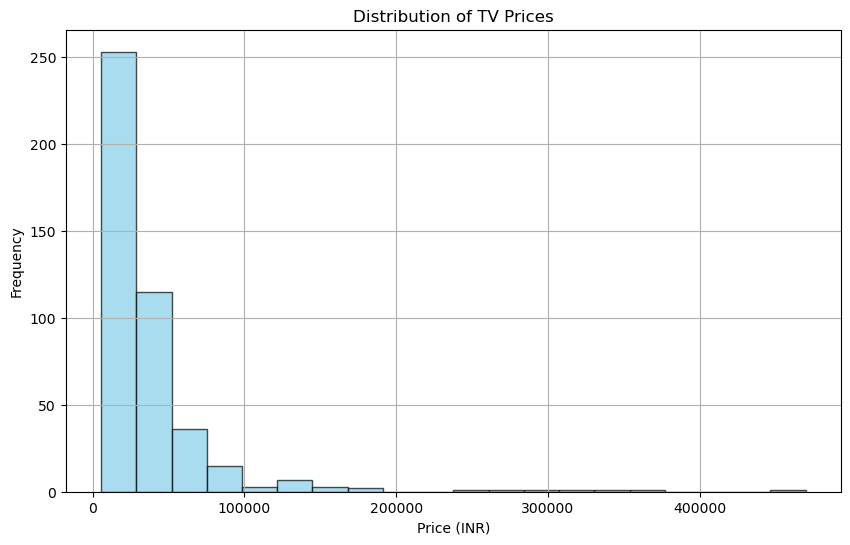

In [178]:
#Distribution of Prices:
import matplotlib.pyplot as plt

# Plot histogram of TV prices
plt.figure(figsize=(10, 6))
plt.hist(df['PRICE'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of TV Prices')
plt.xlabel('Price (INR)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


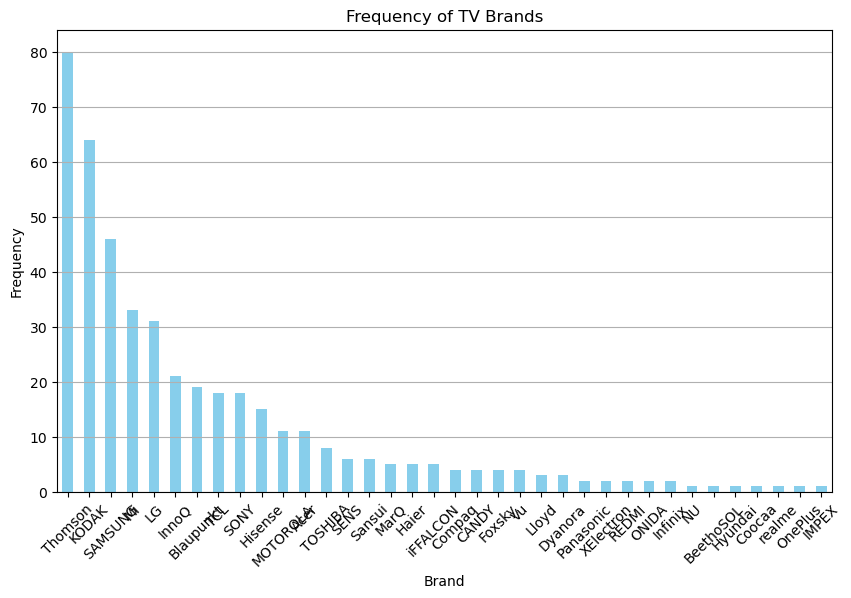

In [190]:
#  Bar Graph of TV Brands vs. Frequency
plt.figure(figsize=(10, 6))
df['BRAND'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Frequency of TV Brands')
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


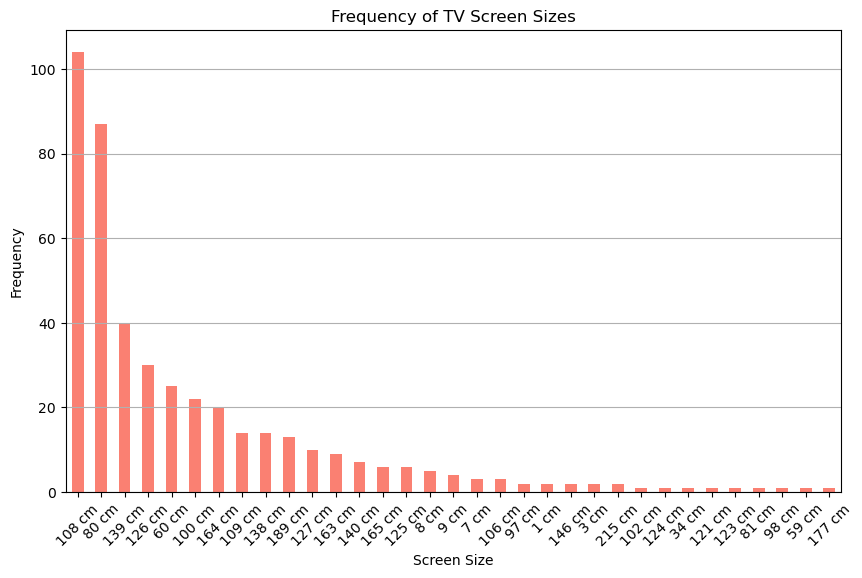

In [191]:
#  Bar Graph of TV Screen Sizes vs. Frequency
plt.figure(figsize=(10, 6))
df['SIZE'].value_counts().plot(kind='bar', color='salmon')
plt.title('Frequency of TV Screen Sizes')
plt.xlabel('Screen Size')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

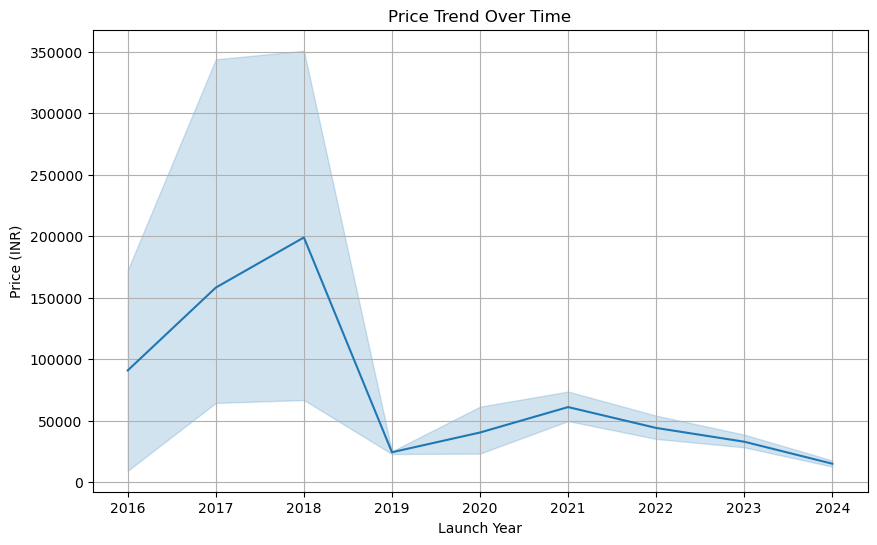

In [171]:
#Price Trends Over Time:
# Plot line plot for price trend over launch years
plt.figure(figsize=(10, 6))
sns.lineplot(x='LAUNCH YEAR', y='PRICE', data=df)
plt.title('Price Trend Over Time')
plt.xlabel('Launch Year')
plt.ylabel('Price (INR)')
plt.grid(True)
plt.show()


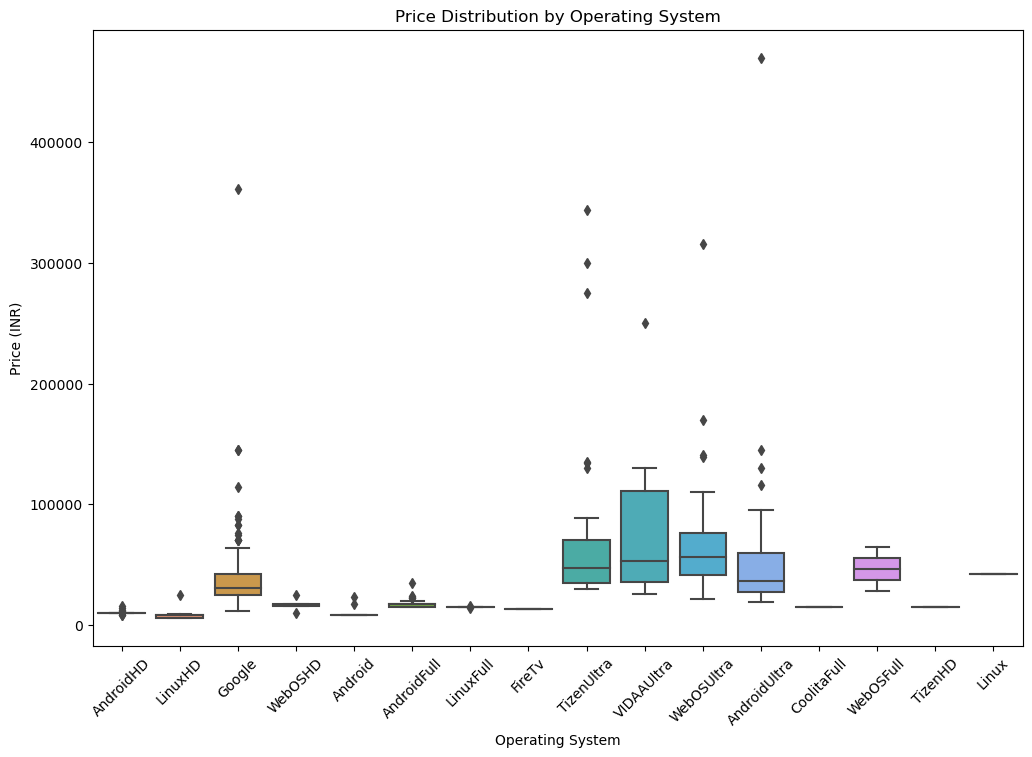

In [198]:
#Price vs. Operating System:
# Create box plot for price distribution across operating systems
plt.figure(figsize=(12, 8))
sns.boxplot(x='OS', y='PRICE', data=df)
plt.title('Price Distribution by Operating System')
plt.xlabel('Operating System')
plt.ylabel('Price (INR)')
plt.xticks(rotation=45)
plt.show()

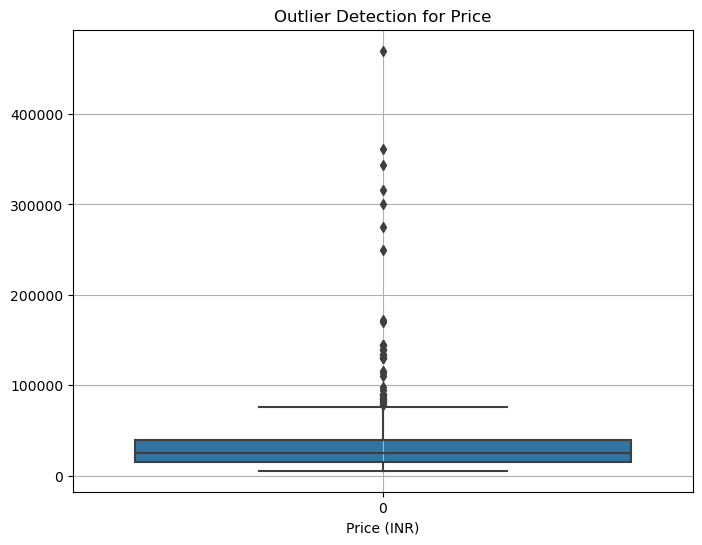

In [199]:
#Outlier Detection:
# Detect and visualize outliers in price using box plot
plt.figure(figsize=(8, 6))
sns.boxplot(df['PRICE'])
plt.title('Outlier Detection for Price')
plt.xlabel('Price (INR)')
plt.grid(True)
plt.show()

In [200]:
#Bivariate Analysis

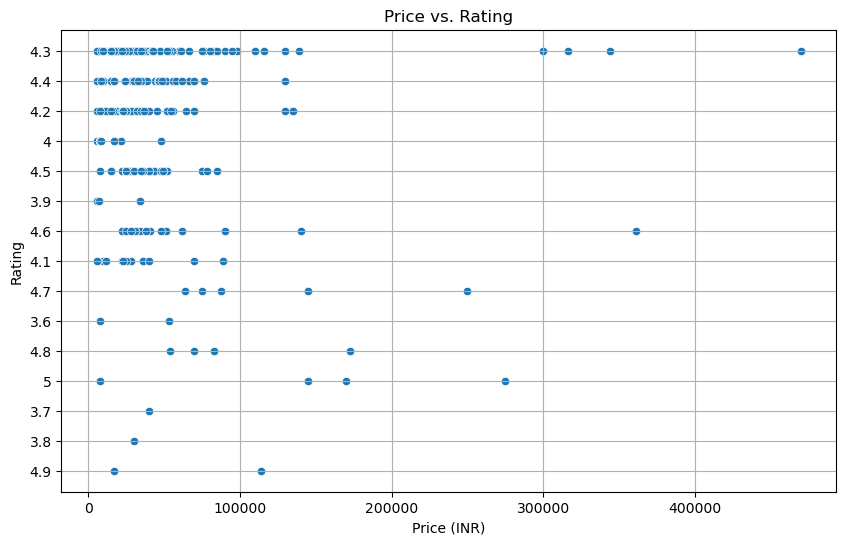

In [172]:
#Price vs. Rating:
# Create scatter plot for price vs. rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PRICE', y='RATING', data=df)
plt.title('Price vs. Rating')
plt.xlabel('Price (INR)')
plt.ylabel('Rating')
plt.grid(True)
plt.show()


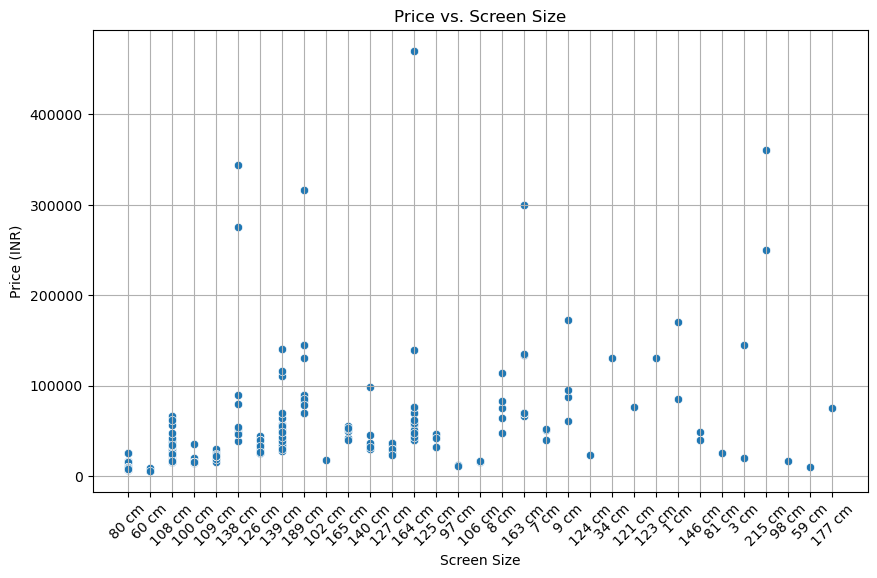

In [173]:
#Price vs. Screen Size:
# Create scatter plot for price vs. screen size
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SIZE', y='PRICE', data=df)
plt.title('Price vs. Screen Size')
plt.xlabel('Screen Size')
plt.ylabel('Price (INR)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_13408\2151814330.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df[['PRICE', 'SIZE', 'LAUNCH YEAR', 'RATING']].corr()


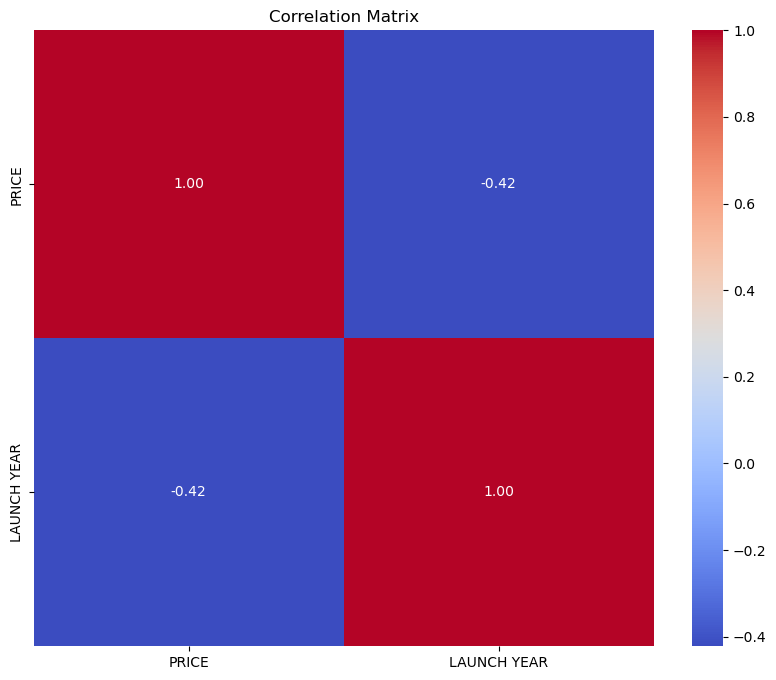

In [175]:
# Calculate correlation matrix
correlation_matrix = df[['PRICE', 'SIZE', 'LAUNCH YEAR', 'RATING']].corr()

# Plot correlation matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


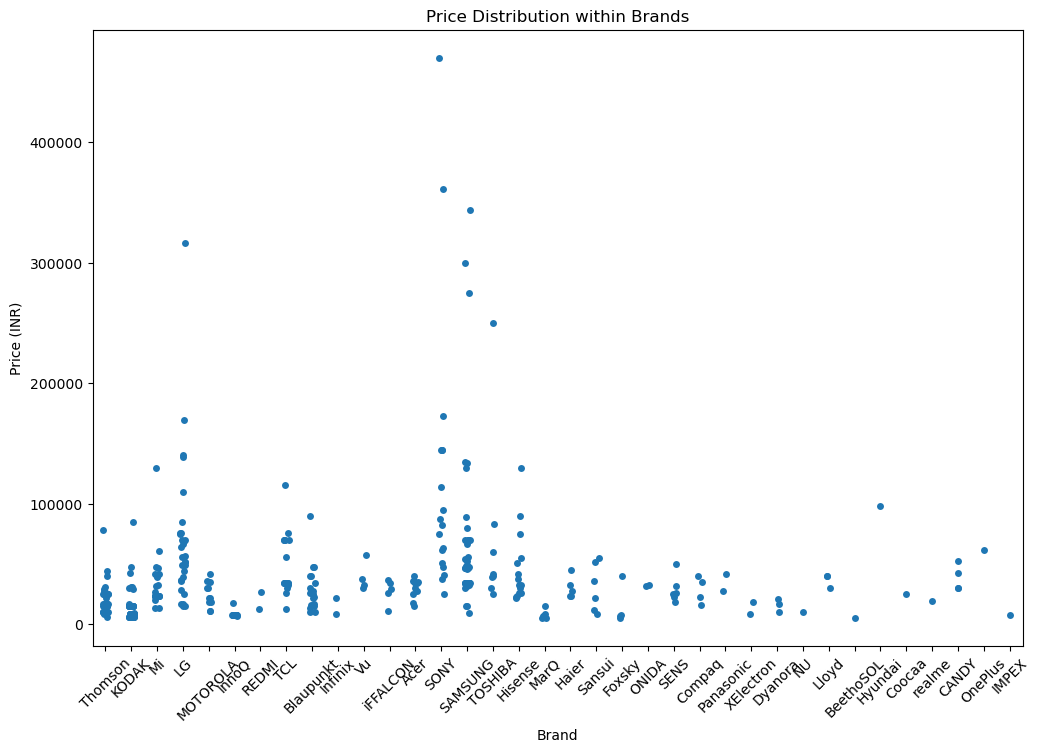

In [177]:
#Price Segmentation:
# Visualize price distribution within different segments (e.g., brands)
plt.figure(figsize=(12, 8))
sns.stripplot(x='BRAND', y='PRICE', data=df, jitter=True)
plt.title('Price Distribution within Brands')
plt.xlabel('Brand')
plt.ylabel('Price (INR)')
plt.xticks(rotation=45)
plt.show()
